In [1]:
## Visualizations: Housing Price Index vs Federal Interest Rate for CT, MD, WA, TX, and the U.S. 
# Must have the following files: [quarterly_ir_data.csv], [CTSTHPI.csv], [MDSTHPI.csv], [TXSTHPI.csv], [WASTHPI.csv], [USSTHPI.csv], [Pandas_Project1_CMD_combined_housing.ipynb] 

In [ ]:
# Data Modification

In [9]:
# Dependencies and Setup
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np

In [10]:
#First find where the csv file is to convert into a DF
fed_int_rates_monthly_df = pd.read_csv("Resources/fed_int_rates.csv")

In [11]:
#converting monthly to Quarterly Data(interest rates)

fed_int_rates_monthly_data = {
    'Date': ['01-01-2003','02-01-2003','03-01-2003','04-01-2003','05-01-2003','06-01-2003','01-01-2003','02-01-2003','03-01-2003','04-01-2003','05-01-2003','06-01-2003', 
             '07-01-2003', '08-01-2003', '09-01-2003', '10-01-2003', '11-01-2003', '12-01-2003', '01-01-2004','02-01-2004','03-01-2004','04-01-2004','05-01-2004','06-01-2004', 
             '07-01-2004', '08-01-2004', '09-01-2004', '10-01-2004', '11-01-2004', '12-01-2004', '01-01-2005','02-01-2005','03-01-2005','04-01-2005','05-01-2005','06-01-2005', 
             '07-01-2005', '08-01-2005', '09-01-2005', '10-01-2005', '11-01-2005', '12-01-2005', '01-01-2006','02-01-2006','03-01-2006','04-01-2006','05-01-2006','06-01-2006', 
             '07-01-2006', '08-01-2006', '09-01-2006', '10-01-2006', '11-01-2006', '12-01-2006', '01-01-2007','02-01-2007','03-01-2007','04-01-2007','05-01-2007','06-01-2007', 
             '07-01-2007', '08-01-2007', '09-01-2007', '10-01-2007', '11-01-2007', '12-01-2007', '01-01-2008','02-01-2008','03-01-2008','04-01-2008','05-01-2008','06-01-2008', 
             '07-01-2008', '08-01-2008', '09-01-2008', '10-01-2008', '11-01-2008', '12-01-2008', '01-01-2009','02-01-2009','03-01-2009','04-01-2009','05-01-2009','06-01-2009', 
             '07-01-2009', '08-01-2009', '09-01-2009', '10-01-2009', '11-01-2009', '12-01-2009', '01-01-2010','02-01-2010','03-01-2010','04-01-2010','05-01-2010','06-01-2010', 
             '07-01-2010', '08-01-2010', '09-01-2010', '10-01-2010', '11-01-2010', '12-01-2010', '01-01-2011','02-01-2011','03-01-2011','04-01-2011','05-01-2011','06-01-2011', 
             '07-01-2011', '08-01-2011', '09-01-2011', '10-01-2011', '11-01-2011', '12-01-2011', '01-01-2012','02-01-2012','03-01-2012','04-01-2012','05-01-2012','06-01-2012', 
             '07-01-2012', '08-01-2012', '09-01-2012', '10-01-2012', '11-01-2012', '12-01-2012', '01-01-2013','02-01-2013','03-01-2013','04-01-2013','05-01-2013','06-01-2013', 
             '07-01-2013', '08-01-2013', '09-01-2013', '10-01-2013', '11-01-2013', '12-01-2013', '01-01-2014','02-01-2014','03-01-2014','04-01-2014','05-01-2014','06-01-2014',
             '07-01-2014', '08-01-2014', '09-01-2014', '10-01-2014', '11-01-2014', '12-01-2014', '01-01-2015','02-01-2015','03-01-2015','04-01-2015','05-01-2015','06-01-2015', 
             '07-01-2015', '08-01-2015', '09-01-2015', '10-01-2015', '11-01-2015', '12-01-2015', '01-01-2016','02-01-2016','03-01-2016','04-01-2016','05-01-2016','06-01-2016', 
             '07-01-2016', '08-01-2016', '09-01-2016', '10-01-2016', '11-01-2016', '12-01-2016', '01-01-2017','02-01-2017','03-01-2017','04-01-2017','05-01-2017','06-01-2017', 
             '07-01-2017', '08-01-2017', '09-01-2017', '10-01-2017', '11-01-2017', '12-01-2017' ], 'Interest_Rate_Index': [600, 400, 200, 0, 100, 200, 300, 400, 500, 600, 700, 800]
}


#convert the 'Date' column to a datetime to make it easier to change
fed_int_rates_monthly_df['Date'] = pd.to_datetime(fed_int_rates_monthly_df['Date'])


#finally create a new DF with quarterly dates
fed_int_rates_quarterly_dates = pd.date_range(start='01-01-2003', end='03-01-2017', freq='Q')
fed_int_rates_quarterly_data = {'Date': fed_int_rates_quarterly_dates, 'QIR':[0] * len(fed_int_rates_quarterly_dates)}
fed_int_rates_quarterly_df = pd.DataFrame(fed_int_rates_quarterly_data)

#calculate quarterly totals by doing the average for the monthly values for each quarter(whew)
for i, fed_int_rates_quarterly_date in enumerate(fed_int_rates_quarterly_dates):
    start_date = fed_int_rates_quarterly_date
    end_date = fed_int_rates_quarterly_dates[i + 1] if i < len(fed_int_rates_quarterly_dates) - 1 else '12-01-2003'
    fed_int_rates_quarterly_total = fed_int_rates_monthly_df.loc[(fed_int_rates_monthly_df['Date'] >= start_date) & (fed_int_rates_monthly_df['Date'] < end_date), 'Effective Federal Funds Rate'].mean()
    fed_int_rates_quarterly_df.loc[i, 'QIR'] = fed_int_rates_quarterly_total

#move dates to 1st of Quarter instead of 
#source: https://stackoverflow.com/questions/37135699/get-first-date-and-last-date-of-current-quarter-in-python
fed_int_rates_quarterly_df['Date'] = fed_int_rates_quarterly_df['Date'].dt.to_period('Q').dt.to_timestamp()

In [12]:
#Convert the Rates to two decimal places
for QIR in fed_int_rates_quarterly_df.columns: 
    if fed_int_rates_quarterly_df[QIR].dtype == 'float64': 
        fed_int_rates_quarterly_df[QIR] = fed_int_rates_quarterly_df[QIR].round(2)

#print the DF(to check)
print(fed_int_rates_quarterly_df)

         Date   QIR
0  2003-01-01  1.25
1  2003-04-01  1.02
2  2003-07-01  1.00
3  2003-10-01  1.00
4  2004-01-01  1.01
5  2004-04-01  1.43
6  2004-07-01  1.95
7  2004-10-01  2.47
8  2005-01-01  2.94
9  2005-04-01  3.46
10 2005-07-01  3.98
11 2005-10-01  4.46
12 2006-01-01  4.91
13 2006-04-01  5.25
14 2006-07-01  5.25
15 2006-10-01  5.26
16 2007-01-01  5.25
17 2007-04-01  5.07
18 2007-07-01  4.50
19 2007-10-01  3.18
20 2008-01-01  2.09
21 2008-04-01  1.94
22 2008-07-01  0.51
23 2008-10-01  0.18
24 2009-01-01  0.18
25 2009-04-01  0.16
26 2009-07-01  0.12
27 2009-10-01  0.13
28 2010-01-01  0.19
29 2010-04-01  0.19
30 2010-07-01  0.19
31 2010-10-01  0.16
32 2011-01-01  0.09
33 2011-04-01  0.08
34 2011-07-01  0.07
35 2011-10-01  0.10
36 2012-01-01  0.15
37 2012-04-01  0.14
38 2012-07-01  0.16
39 2012-10-01  0.14
40 2013-01-01  0.12
41 2013-04-01  0.08
42 2013-07-01  0.09
43 2013-10-01  0.07
44 2014-01-01  0.09
45 2014-04-01  0.09
46 2014-07-01  0.10
47 2014-10-01  0.11
48 2015-01-01  0.12


In [ ]:
# Data Cleaning and Merging

In [13]:
file_fed_int = Path("quarterly_ir_data.csv")
file_hpi = Path("Pandas_Project1_CMD_combined_housing.ipynb")

In [14]:
# Store files as a variables
file_ct = Path("Resources/CTSTHPI.csv")
file_md = Path("Resources/MDSTHPI.csv")
file_tx = Path("Resources/TXSTHPI.csv")
file_wa = Path("Resources/WASTHPI.csv")
file_us = Path("Resources/USSTHPI.csv")
file_fed_int_rate = Path("Resources/quarterly_ir_data.csv")

In [15]:
# Read .csv files
file_ct_df = pd.read_csv(file_ct)
file_md_df = pd.read_csv(file_md)
file_tx_df = pd.read_csv(file_tx)
file_wa_df = pd.read_csv(file_wa)
file_us_df = pd.read_csv(file_us)
file_fed_int_rate_df = pd.read_csv(file_fed_int_rate)

In [16]:
# Converting Date datatype
# Source for converting date datatype: https://medium.com/analytics-vidhya/how-to-pd-merge-two-data-frames-on-a-common-date-column-e7808d7ccaee
file_ct_df['DATE'] = pd.to_datetime(file_ct_df.DATE)
file_md_df['DATE'] = pd.to_datetime(file_md_df.DATE)
file_tx_df['DATE'] = pd.to_datetime(file_tx_df.DATE)
file_wa_df['DATE'] = pd.to_datetime(file_wa_df.DATE)
file_us_df['DATE'] = pd.to_datetime(file_us_df.DATE)
#file_fed_int_rate_df['Date'] = pd.to_datetime(file_fed_int_rate_df.DATE)

In [17]:
# Checking the file_us_df DATE format
file_us_df.info

<bound method DataFrame.info of          DATE  USSTHPI
0  2003-01-01   279.78
1  2003-04-01   283.20
2  2003-07-01   287.57
3  2003-10-01   295.70
4  2004-01-01   300.36
..        ...      ...
76 2022-01-01   578.71
77 2022-04-01   617.95
78 2022-07-01   628.40
79 2022-10-01   623.26
80 2023-01-01   625.38

[81 rows x 2 columns]>

In [18]:
# Reset indices for dataframes
file_ct_df.reset_index()
file_md_df.reset_index()
file_tx_df.reset_index()
file_wa_df.reset_index()
file_us_df.reset_index()

,index,DATE,USSTHPI
0,0,2003-01-01,279.78
1,1,2003-04-01,283.20
2,2,2003-07-01,287.57
3,3,2003-10-01,295.70
4,4,2004-01-01,300.36
...,...,...,...
76,76,2022-01-01,578.71
77,77,2022-04-01,617.95
78,78,2022-07-01,628.40
79,79,2022-10-01,623.26


In [19]:
# Checking the file_us_df type
type(file_us_df)

pandas.core.frame.DataFrame

In [20]:
# Concatenate all state & US dataframes
combined_hpi = pd.concat([file_ct_df[["DATE","CTSTHPI"]], file_md_df["MDSTHPI"], file_tx_df["TXSTHPI"], file_wa_df["WASTHPI"], file_us_df["USSTHPI"]], axis = 1)

In [ ]:
# Drop rows where there are missing values
combined_hpi_ir.dropna(inplace=True)

In [21]:
# Display last 5 concatenated states & US dataframes
combined_hpi.tail()

,DATE,CTSTHPI,MDSTHPI,TXSTHPI,WASTHPI,USSTHPI
76,2022-01-01,522.84,599.85,459.73,911.13,578.71
77,2022-04-01,555.63,628.90,493.63,975.15,617.95
78,2022-07-01,566.25,630.36,503.83,966.46,628.40
79,2022-10-01,564.56,628.93,500.08,938.28,623.26
80,2023-01-01,569.09,631.33,499.26,934.99,625.38


In [22]:
# Verify count of rows in combined dataframe is equal to rows in .csv file less header
combined_hpi.value_counts()

DATE        CTSTHPI  MDSTHPI  TXSTHPI  WASTHPI  USSTHPI
2003-01-01  338.56   307.81   183.63   311.18   279.78     1
2013-04-01  381.58   410.60   230.65   397.21   321.59     1
2017-10-01  393.22   461.79   312.87   583.35   403.75     1
2017-07-01  393.42   458.99   310.14   574.93   400.41     1
2017-04-01  390.90   455.42   305.67   558.42   394.31     1
                                                          ..
2009-07-01  412.37   437.54   223.66   432.91   332.70     1
2009-04-01  423.09   448.65   225.87   447.77   341.62     1
2009-01-01  437.25   466.80   227.38   467.71   350.82     1
2008-10-01  433.82   471.50   224.74   471.41   348.24     1
2023-01-01  569.09   631.33   499.26   934.99   625.38     1
Name: count, Length: 81, dtype: int64

In [23]:
# Write file to .csv
#Source for writing file to .csv: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.to_csv.html
filepath = Path("Resources/combined_hpi.csv")
filepath.parent.mkdir(parents=True, exist_ok=True)
combined_hpi.to_csv(filepath)

In [24]:
file_fed_int_rate_df.head()

,Date,QIR
0,2003-01-01,1.25
1,2003-04-01,1.02
2,2003-07-01,1.00
3,2003-10-01,1.00
4,2004-01-01,1.01


In [ ]:
# Data Visualizations

In [25]:
#DF rows did not match up so cut to make the rows even
file_fed_int_rate_df_cut = file_fed_int_rate_df.head(55)
file_ct_df_cut = file_ct_df.head(55)
file_md_df_cut = file_md_df.head(55)
file_tx_df_cut = file_tx_df.head(55)
file_wa_df_cut = file_wa_df.head(55)
file_us_df_cut = file_us_df.head(55)

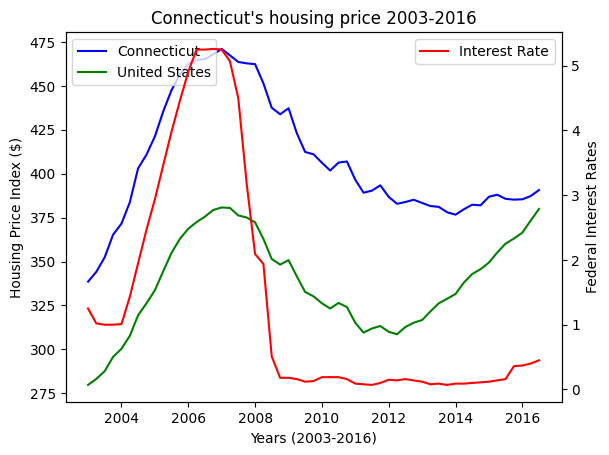

In [26]:
#Graph 1: Connecticut (CT)'s housing prices vs interest rates over years 2003 to 2016 (20 years)
#Set variables
years = file_us_df_cut["DATE"]
ct_line = file_ct_df_cut["CTSTHPI"]
us_line = file_us_df_cut["USSTHPI"]
fed_int_line = file_fed_int_rate_df_cut["QIR"]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot variable1&2 on the first y-axis
ax1.plot(years, ct_line, color='blue', label='Connecticut')
ax1.plot(years, us_line, color='green', label='United States')

# Set label and color for the first y-axis
ax1.set_xlabel('Years (2003-2016)')
ax1.set_ylabel('Housing Price Index ($)', color='black')

# Create a second y-axis with a different scale
ax2 = ax1.twinx()

# Plot variable3 on the second y-axis
ax2.plot(years, fed_int_line, color='red', label='Interest Rate')

# Set label and color for the second y-axis
ax2.set_ylabel('Federal Interest Rates', color='black')
plt.title("Connecticut's housing price 2003-2016")

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

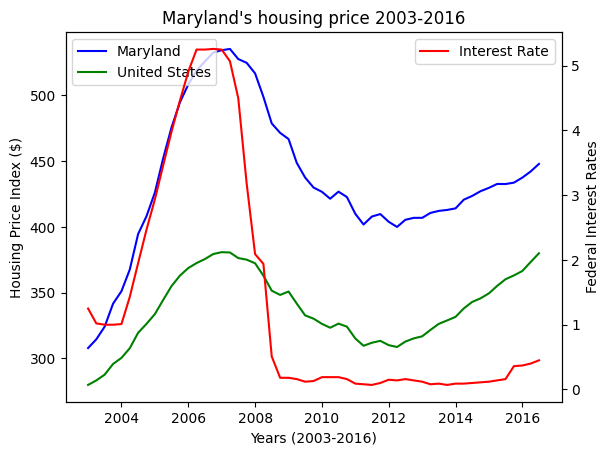

In [27]:
#Graph 2: Maryland (MD)'s housing prices vs interest rates over years 2003 to 2016 (20 years)
#set variables
years = file_us_df_cut["DATE"]
md_line = file_md_df_cut["MDSTHPI"]
us_line = file_us_df_cut["USSTHPI"]
fed_int_line = file_fed_int_rate_df_cut["QIR"]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot variable1&2 on the first y-axis
ax1.plot(years, md_line, color='blue', label='Maryland')
ax1.plot(years, us_line, color='green', label='United States')

# Set label and color for the first y-axis
ax1.set_xlabel('Years (2003-2016)')
ax1.set_ylabel('Housing Price Index ($)', color='black')

# Create a second y-axis with a different scale
ax2 = ax1.twinx()

# Plot variable3 on the second y-axis
ax2.plot(years, fed_int_line, color='red', label='Interest Rate')

# Set label and color for the second y-axis
ax2.set_ylabel('Federal Interest Rates', color='black')
plt.title("Maryland's housing price 2003-2016")

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

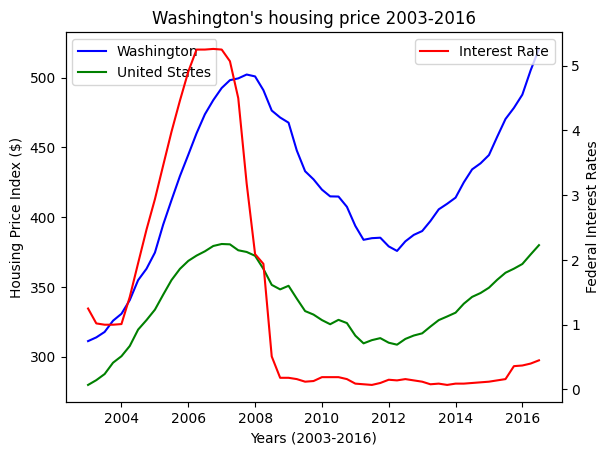

In [28]:
#Graph 3: Texas (TX)'s housing prices vs interest rates over years 2003 to 2016 (20 years)
#set variables 
years = file_us_df_cut["DATE"]
wa_line = file_wa_df_cut["WASTHPI"]
us_line = file_us_df_cut["USSTHPI"]
fed_int_line = file_fed_int_rate_df_cut["QIR"]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot variable1&2 on the first y-axis
ax1.plot(years, wa_line, color='blue', label='Washington')
ax1.plot(years, us_line, color='green', label='United States')

# Set label and color for the first y-axis
ax1.set_xlabel('Years (2003-2016)')
ax1.set_ylabel('Housing Price Index ($)', color='black')

# Create a second y-axis with a different scale
ax2 = ax1.twinx()

# Plot variable3 on the second y-axis
ax2.plot(years, fed_int_line, color='red', label='Interest Rate')

# Set label and color for the second y-axis
ax2.set_ylabel('Federal Interest Rates', color='black')
plt.title("Washington's housing price 2003-2016")

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

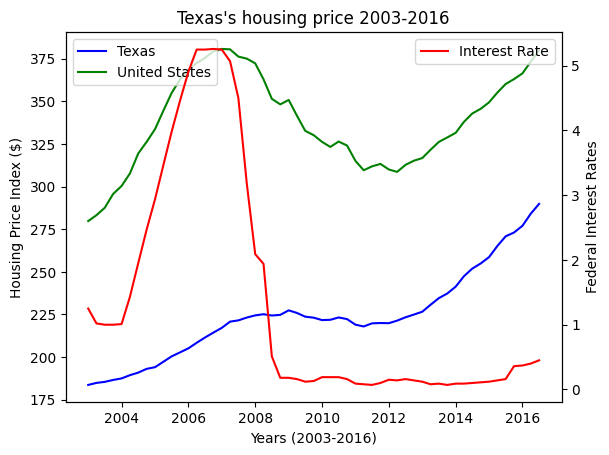

In [29]:
#Graph 4: Washington (WA)'s housing prices vs interest rates over years 2003 to 2016 (20 years)
#set variables
years = file_us_df_cut["DATE"]
tx_line = file_tx_df_cut["TXSTHPI"]
us_line = file_us_df_cut["USSTHPI"]
fed_int_line = file_fed_int_rate_df_cut["QIR"]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot variable1&2 on the first y-axis
ax1.plot(years, tx_line, color='blue', label='Texas')
ax1.plot(years, us_line, color='green', label='United States')

# Set label and color for the first y-axis
ax1.set_xlabel('Years (2003-2016)')
ax1.set_ylabel('Housing Price Index ($)', color='black')

# Create a second y-axis with a different scale
ax2 = ax1.twinx()

# Plot variable3 on the second y-axis
ax2.plot(years, fed_int_line, color='red', label='Interest Rate')

# Set label and color for the second y-axis
ax2.set_ylabel('Federal Interest Rates', color='black')
plt.title("Texas's housing price 2003-2016")

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

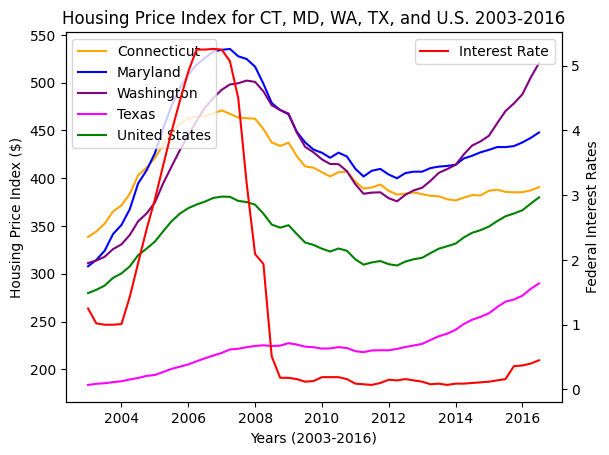

In [30]:
#Graph 5: United States overall average housing price vs interest rates over the years 2003 to 2016 (20 years) 
#set variables
years = file_us_df_cut["DATE"]
ct_line = file_ct_df_cut["CTSTHPI"]
md_line = file_md_df_cut["MDSTHPI"]
wa_line = file_wa_df_cut["WASTHPI"]
tx_line = file_tx_df_cut["TXSTHPI"]
us_line = file_us_df_cut["USSTHPI"]
fed_int_line = file_fed_int_rate_df_cut["QIR"]

# Create figure and axes
fig, ax1 = plt.subplots()

# Plot variable1 on the first y-axis
ax1.plot(years, ct_line, color='orange', label='Connecticut')
ax1.plot(years, md_line, color='blue', label='Maryland')
ax1.plot(years, wa_line, color='purple', label='Washington')
ax1.plot(years, tx_line, color='magenta', label='Texas')
ax1.plot(years, us_line, color='green', label='United States')

# Set label and color for the first y-axis
ax1.set_xlabel('Years (2003-2016)')
ax1.set_ylabel('Housing Price Index ($)', color='black')

# Create a second y-axis with a different scale
ax2 = ax1.twinx()

# Plot variable3 and variable4 on the second y-axis
ax2.plot(years, fed_int_line, color='red', label='Interest Rate')

# Set label and color for the second y-axis
ax2.set_ylabel('Federal Interest Rates', color='black')
plt.title("Housing Price Index for CT, MD, WA, TX, and U.S. 2003-2016")

# Show legend for both y-axes
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()

In [31]:
# Read .csv files
file_ct_df = pd.read_csv(file_ct)
file_md_df = pd.read_csv(file_md)
file_tx_df = pd.read_csv(file_tx)
file_wa_df = pd.read_csv(file_wa)
file_us_df = pd.read_csv(file_us)